<div style="padding: 35px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;">
<b>
<span style='color:skyblue'>IEEE FCIH SB Machine Learning season 2025 </span>
</b>
<div>
<span style='color:Salmon'>Artificial Neural Networks (ANN)</span>

</div>

</div>

<br>


<a id="r">Table of content</a>
1) [Importing the MNIST (0️⃣ .. 9️⃣) and Visualisation](#1)
2) [Traditional Machine Learning](#2)
    - [RandomForest with the whole dataset](#2.1)
    - [RandomForest with the PCA reduced dim](#2.2)
3) [ANN](#3)
    - [Create Sequential Model](#3.1)
    - [Add Layers](#3.2)
    - [Compile the model](#3.3)
    - [Train the model](#3.4)
4) [Building a Gradio GUI](#4)

# <h1 id="1" style="color: skyblue">Importing the MNIST (0️⃣ .. 9️⃣) and Visualisation</h1>

In [5]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
import numpy as np

In [6]:
# train 
train = pd.read_csv('../11_Unsupervised Learning 1/mnist/train.csv')
# test 
test = pd.read_csv('../11_Unsupervised Learning 1/mnist/test.csv')
# train sahpe and test shape
f'train shape {train.shape}', f'test shape {test.shape}'

('train shape (42000, 785)', 'test shape (28000, 784)')

In [7]:
# spliting train to x, y
X = train.drop(columns=['label'])
y = train['label']

In [4]:
def show_images(n, dataset=X,  MAX_IMGS=300):
    num_cols = 10
    if n % num_cols == 0 and n <= MAX_IMGS:
        images = dataset.iloc[:n].values.reshape(-1, 28, 28)
        num_rows = n // num_cols
        fig, ax = plt.subplots(num_rows, num_cols, figsize=(num_cols, num_rows))
        for i in range(num_rows):
            for j in range(num_cols):
                ax[i, j].imshow(images[i * num_cols + j], cmap='gray')
                ax[i, j].axis('off')
        plt.show()
    else:
        print('Invalid number of images')

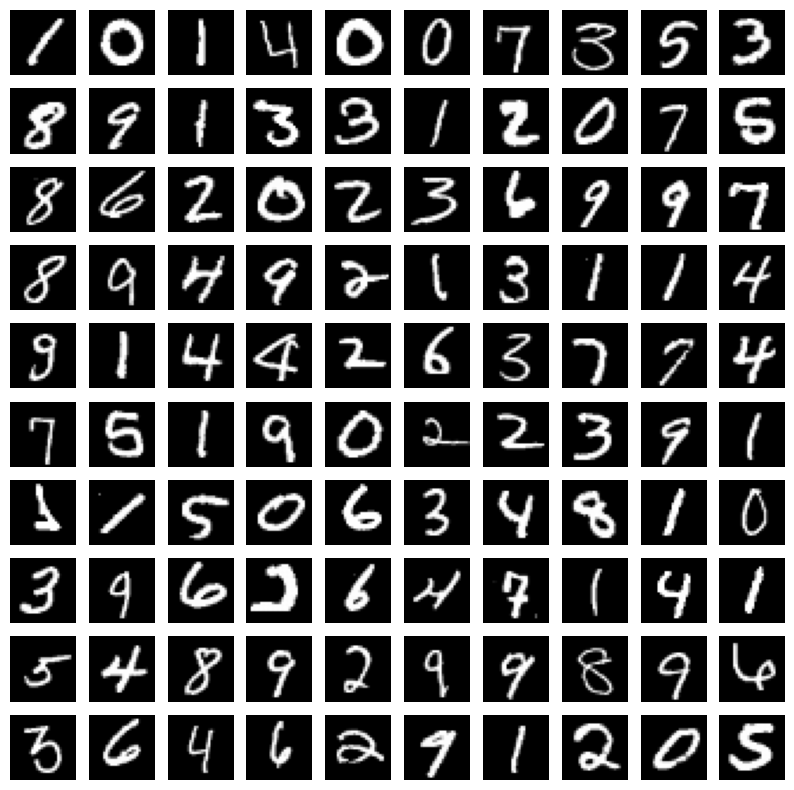

In [5]:
show_images(100)

In [6]:
def show_digits(digit, dataset=X):
    if digit in range(10):
        digit_indices = np.where(y == digit)[0]
        
        for i in range(50):  # Display the first 50 images of the digit
            plt.subplot(5, 10, i + 1)
            imdata = dataset.iloc[digit_indices[i]].values.reshape(28, 28)
            plt.imshow(imdata, cmap='gray')
            plt.xticks([])
            plt.yticks([])

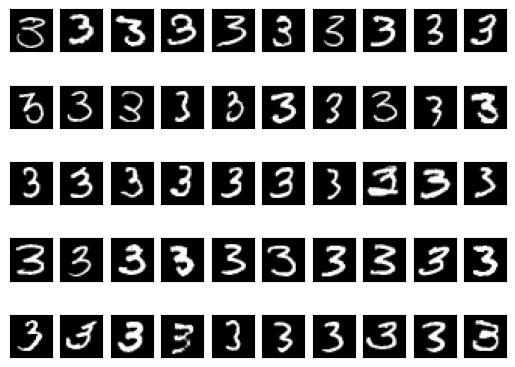

In [7]:
show_digits(3)

In [8]:
def do_pca(n_component, dataset):
    X = StandardScaler().fit_transform(dataset)
    pca = PCA(n_components=n_component)
    x_pca = pca.fit_transform(X)
    return pca, x_pca

In [9]:
import joblib
def fit_forest(X, y, save = (False, 'model_digitREC'), plot =True):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)
    clf = RandomForestClassifier(n_estimators=130, max_depth=None)
    clf.fit(X_train, y_train)
    # predictions
    y_pred = clf.predict(X_test)
    # scoring
    mat = confusion_matrix(y_test, y_pred)
    if plot:
       plt.figure(figsize=(8,8), dpi=170)
       sns.heatmap(mat, annot=True, linewidths=0.5, cmap='Blues',fmt='d')
       plt.show()
    else:
       print(mat)
    acc = accuracy_score(y_test, y_pred)
    print(acc)
    if save[0]:
        joblib.dump(clf, f'{save[1]}.joblib')
    return acc

# <h1 id="2" style="color:skyblue">Traditional Machine Learning</h1>

## <h2 id="21" style="color:skyblue">RandomForest with the whole dataset</h2>

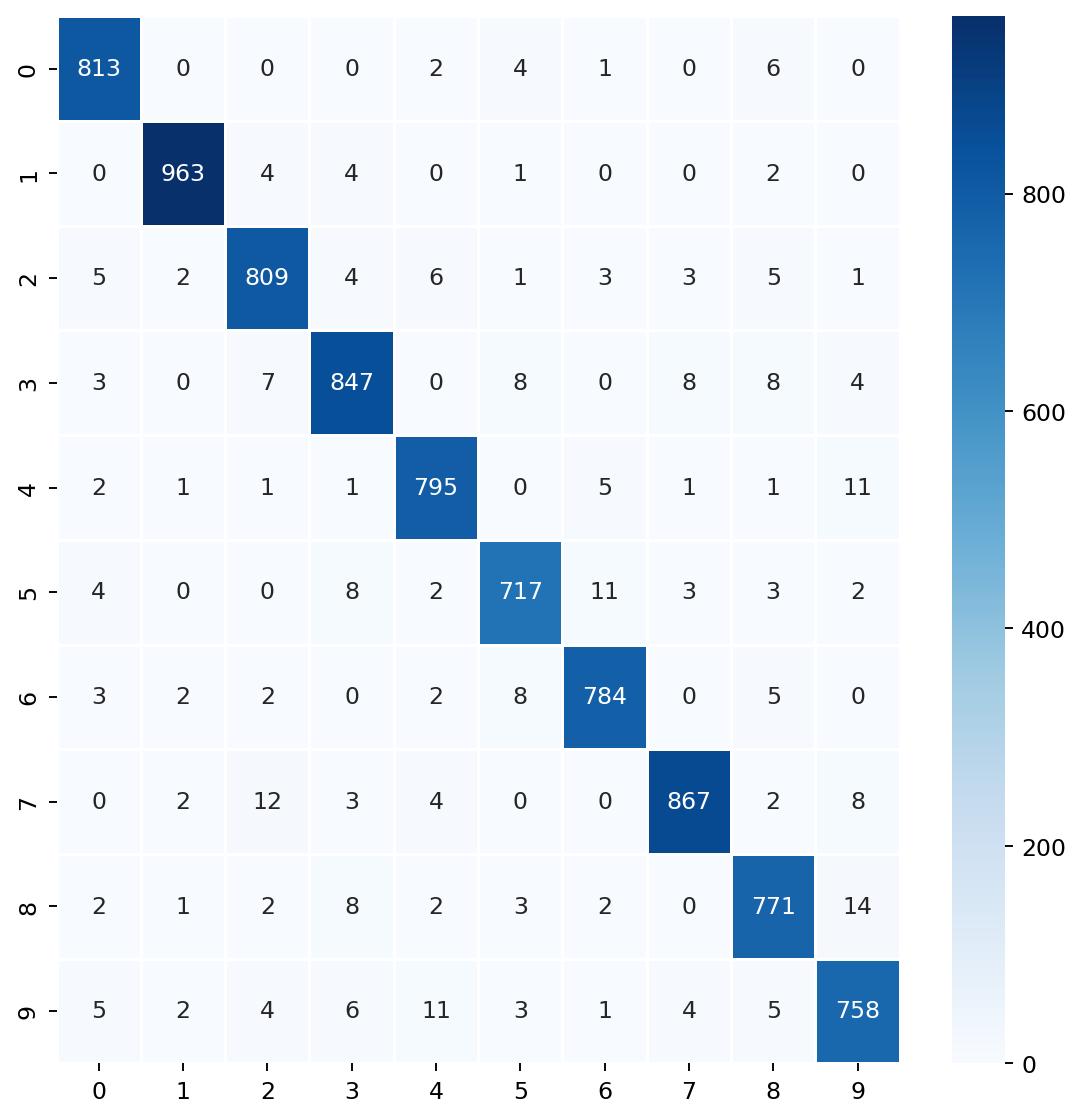

0.9671428571428572


0.9671428571428572

In [10]:
fit_forest(X, y)

## <h2 id="22" style="color:skyblue">RandomForest with the PCA reduced dim</h2>

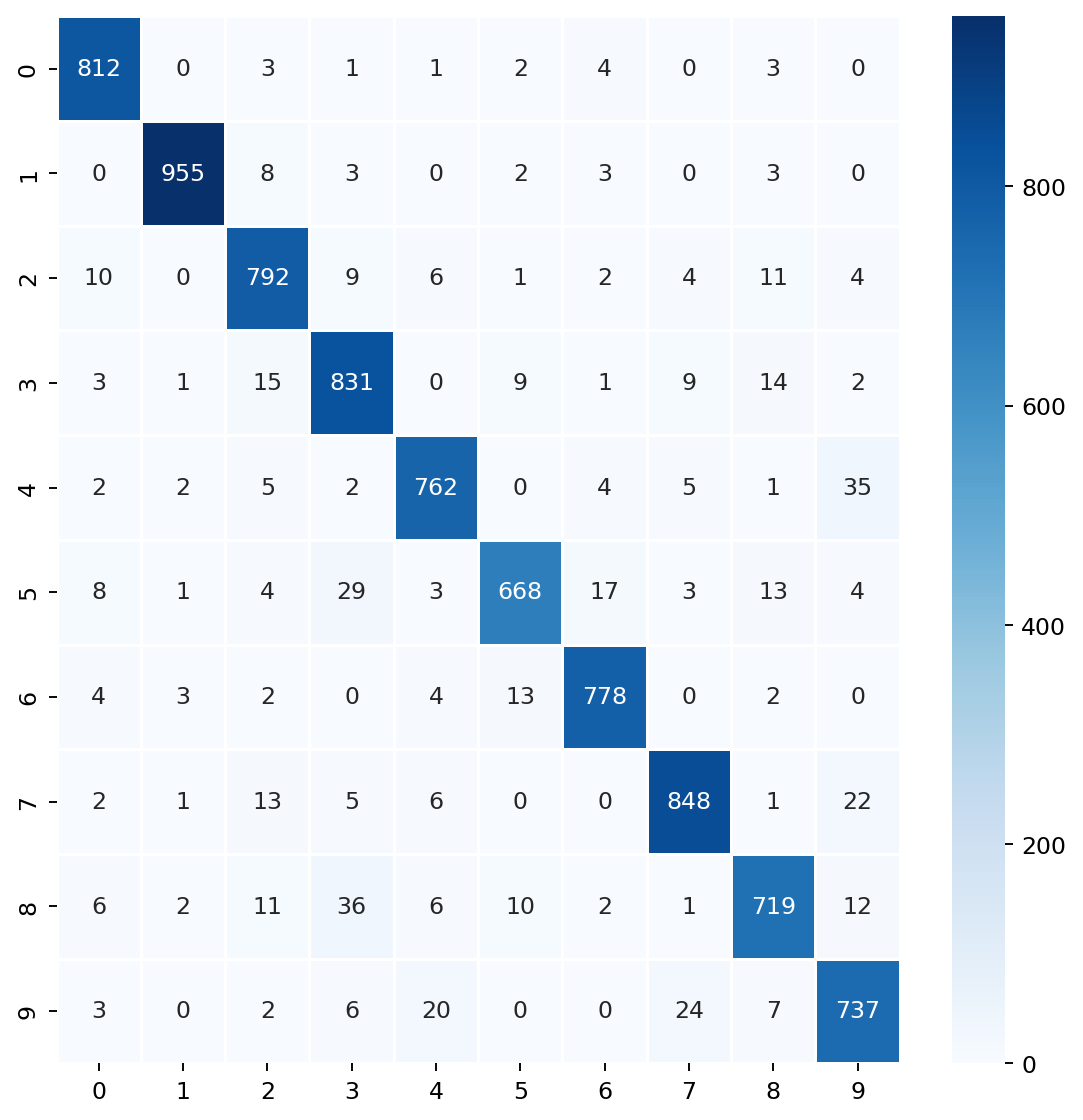

0.9407142857142857


0.9407142857142857

In [11]:
# Reduce the features to 40 only
pca, X_pca = do_pca(40, X)
# let's try fitting to a forest
fit_forest(X_pca, y)

# <h1 style="color:skyblue" id="3">ANN</h1>

In [2]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

> The input data needs to be in the form of a Numpy array or a Tensor, so we need to transfrom the pandas dataframe to numpy array

In [14]:
# from keras.datasets import mnist

# nb_classes = 10

# # the data, shuffled and split between tran and test sets
# (X_train, y_train), (X_test, y_test) = mnist.load_data()
# print("X_train original shape", X_train.shape)
# print("y_train original shape", y_train.shape)

In [17]:
display(X, y)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [18]:
type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [8]:
# Convert pandas DataFrame to numpy array
X = X.to_numpy()
y = y.to_numpy()
# spliting the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# print the shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (33600, 784)
y_train shape: (33600,)
X_test shape: (8400, 784)
y_test shape: (8400,)


In [20]:
type(X_train)

numpy.ndarray

In [23]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [24]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (33600, 784)
Testing matrix shape (8400, 784)


In [ ]:
from keras.utils import to_categorical

# Convert class vectors to binary class matrices
# Convert labels to categorical one-hot encoding
keras.utils.to_categorical([0, 1, 2, 3], num_classes=4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [ ]:
# Convert labels to categorical one-hot encoding
Y_train = to_categorical(y_train, 10)
Y_test =  to_categorical(y_test, 10)

In [ ]:
Y_train[0] 

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [29]:
Y_train[0].argmax()

6

In [27]:
Y_train.shape, Y_test.shape

((33600, 10), (8400, 10))

# Create Sequentianl model

In [30]:
model = Sequential()

# Add layers

In [ ]:
model.add(Dense(10, activation='sigmoid', input_shape=(784,)))
'''
We explicitly express in the input_shape argument of the first layer what the input data is like:
 a tensor that indicates that we have 784 features of the model.

The tensor is being defined is (None, 784,). 
'''
model.add(Dense(10, activation='softmax'))
'''
The second layer is a softmax layer of 10 neurons, 
which means that it will return a matrix of 10 probability values representing the 10 possible digits.

Each value will be the probability that the image of the current digit belongs to each one of them. 
'''

'\nThe second layer is a softmax layer of 10 neurons, \nwhich means that it will return a matrix of 10 probability values representing the 10 possible digits.\n\nEach value will be the probability that the image of the current digit belongs to each one of them. \n'

## <h2 id="33">Compile the model</h2>

`categorical_crossentropy` vs `sparse_categorical_crossentropy`

| Feature           | `categorical_crossentropy`                                        | `sparse_categorical_crossentropy`              |
| ----------------- | ----------------------------------------------------------------- | ---------------------------------------------- |
| 🔢 Label format   | One-hot encoded (e.g., `[0, 1, 0]`)                               | Integer encoded (e.g., `1`)                    |
| 🧠 Usage          | When labels are **one-hot** (use `tf.keras.utils.to_categorical`) | When labels are **integers** (e.g., `0, 1, 2`) |
| ✅ Pros            | Explicit class probabilities                                      | Simpler when you don’t want to convert         |
| ⚠️ Common mistake | Using with integer labels will cause wrong results                | Using with one-hot labels causes error         |



Using `categorical_crossentropy`

```python
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import CategoricalCrossentropy

y = [0, 2, 1]
y_onehot = to_categorical(y, num_classes=3)  # [[1,0,0], [0,0,1], [0,1,0]]

loss_fn = CategoricalCrossentropy()
loss = loss_fn(y_onehot, predictions)

```
-------------------------------------

Using `sparse_categorical_crossentropy`:

```python
from tensorflow.keras.losses import SparseCategoricalCrossentropy

y = [0, 2, 1]  # no need for to_categorical

loss_fn = SparseCategoricalCrossentropy()
loss = loss_fn(y, predictions)  # predictions must still be probabilities
``` 
------------------------------------



| Problem Type               | Labels                    | Output Layer     | Recommended Loss                                    |
| -------------------------- | ------------------------- | ---------------- | --------------------------------------------------- |
| Regression                 | Real values               | Linear           | `MeanSquaredError`, `MeanAbsoluteError`, or `Huber` |
| Binary Classification      | 0 or 1                    | Sigmoid          | `BinaryCrossentropy`                                |
| Multi-class Classification | One-hot                   | Softmax          | `CategoricalCrossentropy`                           |
| Multi-class Classification | Integer (0–N)             | Softmax          | `SparseCategoricalCrossentropy`                     |
| Probabilistic Models       | Probability distributions | Softmax or other | `KLDivergence`                                      |
| Similarity-based tasks     | Feature vectors           | Embeddings       | `CosineSimilarity`                                  |


In [35]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [36]:
# Print the model summary to see the architecture
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## <h2 id="34">Train the model</h2>

In [38]:
history_1 = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=100, epochs=10)

Epoch 1/10
336/336 [==============================] - 1s 2ms/step - loss: 0.3348 - accuracy: 0.9104 - val_loss: 0.3471 - val_accuracy: 0.9050
Epoch 2/10
336/336 [==============================] - 1s 2ms/step - loss: 0.3216 - accuracy: 0.9118 - val_loss: 0.3402 - val_accuracy: 0.9045
Epoch 3/10
336/336 [==============================] - 1s 2ms/step - loss: 0.3103 - accuracy: 0.9146 - val_loss: 0.3295 - val_accuracy: 0.9075
Epoch 4/10
336/336 [==============================] - 1s 2ms/step - loss: 0.3002 - accuracy: 0.9171 - val_loss: 0.3244 - val_accuracy: 0.9065
Epoch 5/10
336/336 [==============================] - 0s 1ms/step - loss: 0.2918 - accuracy: 0.9192 - val_loss: 0.3169 - val_accuracy: 0.9096
Epoch 6/10
336/336 [==============================] - 1s 2ms/step - loss: 0.2843 - accuracy: 0.9208 - val_loss: 0.3118 - val_accuracy: 0.9132
Epoch 7/10
336/336 [==============================] - 1s 2ms/step - loss: 0.2776 - accuracy: 0.9224 - val_loss: 0.3087 - val_accuracy: 0.9118
Epoch 

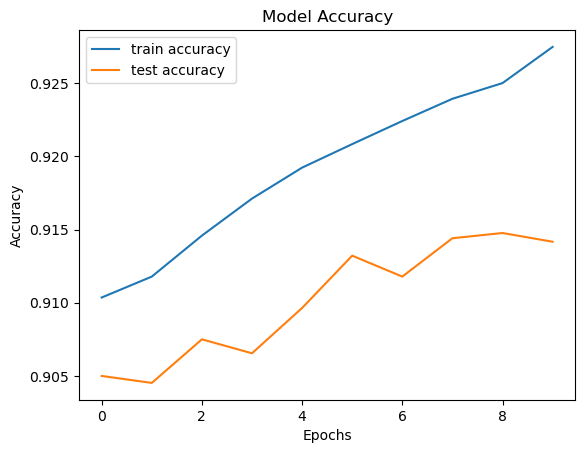

In [ ]:
# plot the training and validation accuracy
plt.plot(history_1.history['accuracy'], label='train accuracy')
plt.plot(history_1.history['val_accuracy'], label='test accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

## Building anthoer model 

In [40]:
# model2
model2 = Sequential()
model2.add(Dense(512, input_shape=(784,)))
model2.add(Activation('relu')) # An "activation" is just a non-linear function applied to the output
                              # of the layer above. Here, with a "rectified linear unit",
                              # we clamp all values below 0 to 0.
                           
model2.add(Dropout(0.2))   # Dropout helps protect the model from memorizing or "overfitting" the training data
model2.add(Dense(256)) # This is a hidden layer with 256 neurons
model2.add(Activation('relu'))
model2.add(Dropout(0.2))
model2.add(Dense(10))
model2.add(Activation('softmax')) # This special "softmax" activation among other things,
                                 # ensures the output is a valid probaility distribution, that is
                                 # that its values are all non-negative and sum to 1.

In [41]:
model2.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [42]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 10)               

In [47]:
history_2 = model2.fit(X_train, Y_train,
          batch_size=128, epochs=10, verbose=1,
          validation_data=(X_test, Y_test),
          callbacks=[
              # checkpoint to save the model
              tf.keras.callbacks.ModelCheckpoint(filepath='Models/ANN_model2.keras', monitor='val_accuracy', save_best_only=True, mode='max'),   
              tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, mode='max', restore_best_weights=True)              
              # mode 'max' means that the model will be saved if the validation accuracy is the highest it has been so far
            ]
          )

Epoch 1/10
263/263 [==============================] - 2s 6ms/step - loss: 0.0197 - accuracy: 0.9936 - val_loss: 0.0926 - val_accuracy: 0.9763
Epoch 2/10
263/263 [==============================] - 2s 7ms/step - loss: 0.0217 - accuracy: 0.9927 - val_loss: 0.0981 - val_accuracy: 0.9750
Epoch 3/10
263/263 [==============================] - 2s 7ms/step - loss: 0.0209 - accuracy: 0.9926 - val_loss: 0.0965 - val_accuracy: 0.9754
Epoch 4/10
263/263 [==============================] - 2s 8ms/step - loss: 0.0197 - accuracy: 0.9934 - val_loss: 0.0878 - val_accuracy: 0.9779
Epoch 5/10
263/263 [==============================] - 2s 7ms/step - loss: 0.0172 - accuracy: 0.9937 - val_loss: 0.0979 - val_accuracy: 0.9758
Epoch 6/10
263/263 [==============================] - 2s 7ms/step - loss: 0.0149 - accuracy: 0.9951 - val_loss: 0.0892 - val_accuracy: 0.9776
Epoch 7/10
263/263 [==============================] - 2s 7ms/step - loss: 0.0179 - accuracy: 0.9939 - val_loss: 0.0952 - val_accuracy: 0.9771


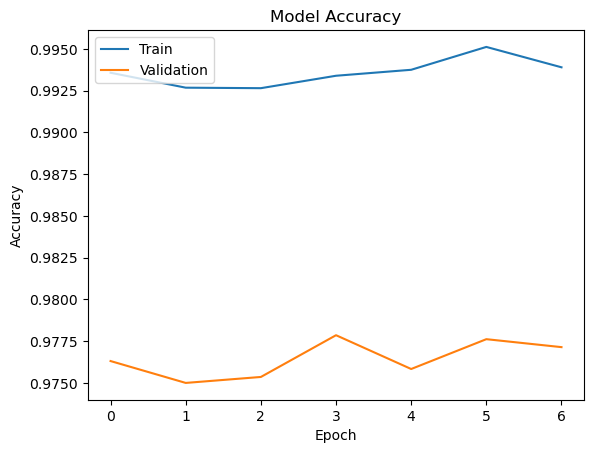

In [48]:
# Plot training & validation accuracy values
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


>The `model.evaluate()` function in Keras is used to assess the performance of a trained deep learning model on a given dataset, typically a validation or test set. This function returns the loss value(s) and any metrics that were specified during the model's compilation.

In [50]:
score = model2.evaluate(X_test, Y_test, verbose=0)
print(score)
print('Test accuracy:', score[1])

[0.08780330419540405, 0.9778571724891663]
Test accuracy: 0.9778571724891663


# Using the trained model to make predictions 

In [3]:
# load the saved model
model2_saved = tf.keras.models.load_model('Models/ANN_model2.keras')

Predicted probabilities: [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


,probabilities
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
5,0.000000
6,1.000000
7,0.000000
8,0.000000
9,0.000000


Predicted class: 6, True label: 6


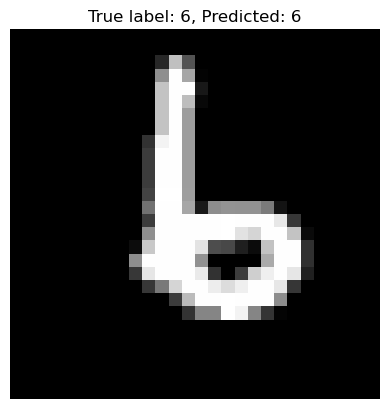

In [34]:
# select a random test sample and use the model to predict it
# also plot the image
import random

def predict_random_sample(model, X_test, y_test):
    random_index = random.randint(0, len(X_test) - 1)
    sample_image = X_test[random_index].reshape(28, 28)
    sample_label = y_test[random_index]
    
    # Predict the class
    prediction = model.predict(X_test[random_index].reshape(1, -1), verbose=0)
    print(f'Predicted probabilities: {prediction}')
    pred_df = pd.DataFrame(prediction).T.rename({0: "probabilities"}, axis=1)
    display(pred_df.style.highlight_min(color='red').highlight_max(color='green'))
    predicted_class = np.argmax(prediction)
    print(f'Predicted class: {predicted_class}, True label: {sample_label}')
    
    # Plot the image
    plt.imshow(sample_image, cmap='gray')
    plt.title(f'True label: {sample_label}, Predicted: {predicted_class}')
    plt.axis('off')
    plt.show()
predict_random_sample(model2_saved, X_test, y_test)


# <h1 id="4" style="color: skyblue">Bulding the Gradio UI</h1>

In [35]:
import numpy as np
from keras.models import load_model
from scipy.ndimage import zoom

# Load your trained model
model = load_model('Models/ANN_model2.keras')


def predict_digit(img):
    # Invert colors: black digit on white background → white digit on black
    img = 255 - img['composite']

    # Normalize (0–1)
    img = img.astype("float32") / 255.0

    # Resize to 28x28 using zoom
    zoom_factor = 28 / img.shape[0]  # Assumes square input (256x256)
    img = zoom(img, zoom_factor)  # img now 28x28

    # Flatten to 784 and reshape for batch dimension
    img = img.reshape(1, 784)

    # Predict
    prediction = model.predict(img, verbose=0)[0] # [[], [], ...] but here [[]] so we get the zero index
    # Get predicted class and confidence
    predicted_class = int(np.argmax(prediction))
    confidence = float(np.max(prediction))

    return f"Prediction: {predicted_class} ({confidence * 100:.2f}%)"

In [37]:
import gradio as gr

# Create Gradio interface
with gr.Blocks() as demo:
    gr.Markdown("## 🖌️ Handwritten Digit Recognition (MNIST Model)")
    gr.Markdown("Draw a digit (0–9) below and click **Recognize**")

    with gr.Row():
        canvas = gr.Sketchpad(
            crop_size=(255,255),
            type="numpy",
            label="Draw Here",
            brush=gr.Brush(),
            image_mode="L",  # grayscale image
        )
        prediction_output = gr.Textbox(label="Prediction")

    with gr.Row():
        recognize_btn = gr.Button("Recognize")
        clear_btn = gr.ClearButton([canvas, prediction_output])

    recognize_btn.click(fn=predict_digit, inputs=canvas, outputs=prediction_output)


demo.launch(share=True) # live demo
# demo.launch()


* Running on local URL:  http://127.0.0.1:7861
* Running on public URL: https://d0ec03035bc0ce32a8.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
